In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris["data"][:,(2,3)]
y = (iris.target == 0).astype(np.int)

/Users/swatikar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [5]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [6]:
y_pred

array([1])

# Activation functions

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f,z,eps=0.000001):
    return (f(z+eps) - f(z-eps))/(2*eps)

# Building an Image classifier

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [11]:
X_train_full.shape

(60000, 28, 28)

The training set contains 60,000 grayscale images, each 28x28 pixels

In [12]:
X_train_full.dtype

dtype('uint8')

Each pixel intensity is represented as a byte (0 to 255)

In [13]:
X_test.shape

(10000, 28, 28)

Split the training set into training and validation set. Scale pixel intensities 0-1 range

In [14]:
X_valid,X_train = X_train_full[:5000]/255 , X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255

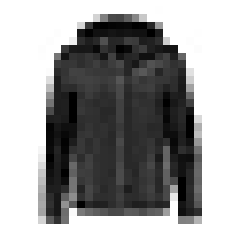

In [17]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [18]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
#first image of training set
class_names[y_train[0]]

'Coat'

Saving figure fashion_mnist_plot


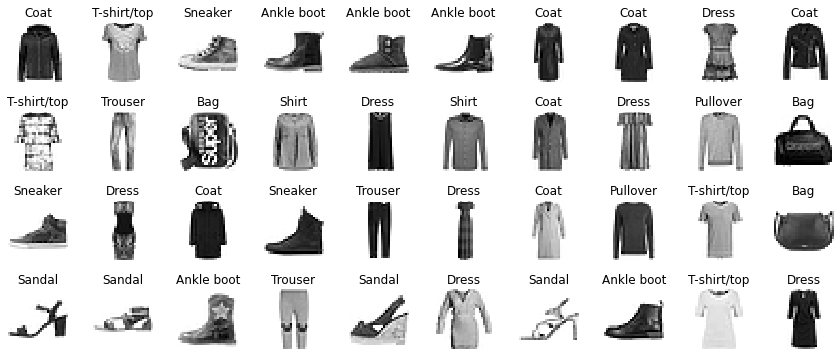

In [27]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.5,n_rows*1.5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index],cmap="binary",interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [29]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
#another approach
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.layers

In [34]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [35]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [36]:
weights,biases = hidden1.get_weights()

In [37]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [38]:
weights.shape

(784, 300)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
biases.shape

(300,)

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [42]:
history = model.fit(X_train,y_train,epochs=30,
                   validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 132us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8160
Epoch 2/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4838 - accuracy: 0.8323 - val_loss: 0.4494 - val_accuracy: 0.8454
Epoch 3/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.4379 - accuracy: 0.8474 - val_loss: 0.4175 - val_accuracy: 0.8550
Epoch 4/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.4127 - accuracy: 0.8557 - val_loss: 0.3902 - val_accuracy: 0.8652
Epoch 5/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.3928 - accuracy: 0.8629 - val_loss: 0.3981 - val_accuracy: 0.8610
Epoch 6/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.3775 - accuracy: 0.8673 - val_loss: 0.3735 - val_accuracy: 0.8744
Epoch 7/30
55000/55000 [===========================

In [43]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [44]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curve_plot


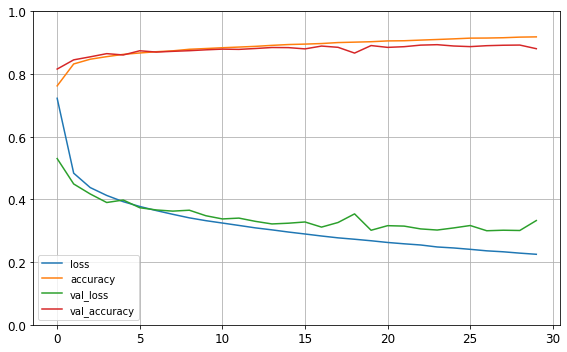

In [46]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curve_plot")
plt.show()

both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good! Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting

In [47]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3675705323696136, 0.8671]

In [48]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [49]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [50]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [51]:
#actual classes
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Regression MLP

In [52]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
X_train.shape

(11610, 8)

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [56]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [58]:
history = model.fit(X_train,y_train,epochs=20,
                   validation_data=(X_valid,y_valid))


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6502 - val_loss: 0.6347
Epoch 2/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6064 - val_loss: 0.6000
Epoch 3/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5766 - val_loss: 0.5774
Epoch 4/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5532 - val_loss: 0.5559
Epoch 5/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5340 - val_loss: 0.5414
Epoch 6/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5166 - val_loss: 0.5275
Epoch 7/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5030 - val_loss: 0.5177
Epoch 8/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4910 - val_loss: 0.5068
Epoch 9/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4810 - val_l

In [60]:
mse_test = model.evaluate(X_test,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [61]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

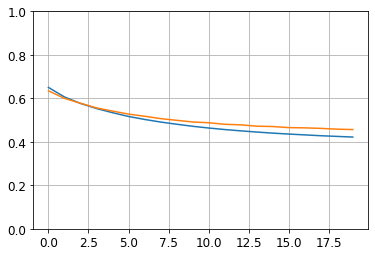

In [62]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
y_pred

array([[0.33763218],
       [1.7375001 ],
       [3.3668528 ]], dtype=float32)

In [65]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs

In [66]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_],outputs=[output])

In [67]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [68]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [70]:
history = model.fit(X_train,y_train,epochs=20,
                   validation_data=(X_valid,y_valid))


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 73us/sample - loss: 1.8716 - val_loss: 0.7290
Epoch 2/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.6590 - val_loss: 0.6027
Epoch 3/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5956 - val_loss: 0.5710
Epoch 4/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5629 - val_loss: 0.5457
Epoch 5/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5400 - val_loss: 0.5434
Epoch 6/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5171 - val_loss: 0.5136
Epoch 7/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5058 - val_loss: 0.5102
Epoch 8/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4876 - val_loss: 0.4945
Epoch 9/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4792 - val_l

In [71]:
mse_test = model.evaluate(X_test,y_test)
y_pred = model.predict(X_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Now we will send 2 different input features

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.models.Model(inputs=[input_A,input_B],outputs=[output])

In [75]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [76]:
X_train_A,X_train_B = X_train[:,:5],X_train[:,2:] 
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

In [77]:
history = model.fit((X_train_A,X_train_B),y_train,epochs=20,
                   validation_data=((X_valid_A,X_valid_B),y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 71us/sample - loss: 1.8095 - val_loss: 0.8101
Epoch 2/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.6798 - val_loss: 0.6453
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5957 - val_loss: 0.5978
Epoch 4/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5580 - val_loss: 0.5669
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5331 - val_loss: 0.5504
Epoch 6/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5124 - val_loss: 0.5346
Epoch 7/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4972 - val_loss: 0.5254
Epoch 8/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4834 - val_loss: 0.5157
Epoch 9/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4746 - val_l

In [78]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Adding an auxilary output for regularization

In [79]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [80]:
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],
             optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [81]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 110us/sample - loss: 2.0913 - main_output_loss: 1.8435 - aux_output_loss: 4.3144 - val_loss: 1.0987 - val_main_output_loss: 0.8657 - val_aux_output_loss: 3.1942
Epoch 2/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.9790 - main_output_loss: 0.7783 - aux_output_loss: 2.7838 - val_loss: 0.8586 - val_main_output_loss: 0.7049 - val_aux_output_loss: 2.2404
Epoch 3/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.8065 - main_output_loss: 0.6677 - aux_output_loss: 2.0549 - val_loss: 0.7512 - val_main_output_loss: 0.6377 - val_aux_output_loss: 1.7705
Epoch 4/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.7200 - main_output_loss: 0.6113 - aux_output_loss: 1.6969 - val_loss: 0.6929 - val_main_output_loss: 0.5968 - val_aux_output_loss: 1.5567
Epoch 5/20
11610/11610 [==============================] - 1s 49us/

In [84]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Saving and restoring

In [85]:
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [87]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 80us/sample - loss: 1.8631 - val_loss: 0.7804
Epoch 2/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6723 - val_loss: 0.6186
Epoch 3/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5927 - val_loss: 0.5829
Epoch 4/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5550 - val_loss: 0.5511
Epoch 5/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5278 - val_loss: 0.5357
Epoch 6/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5032 - val_loss: 0.5102
Epoch 7/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4863 - val_loss: 0.5011
Epoch 8/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4701 - val_loss: 0.4869
Epoch 9/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4586 - val_l

In [88]:
model.save("my_keras_model.h5")

In [89]:
model = keras.models.load_model("my_keras_model.h5")

In [90]:
model.predict(X_new)

array([[0.48175585],
       [1.6805584 ],
       [3.158809  ]], dtype=float32)

In [91]:
model.save_weights("my_keras_weights.ckpt")

In [92]:
model.load_weights("my_keras_weights.ckpt")

# Hyperparameter Tuning

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,
               input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse",optimizer=optimizer)
    return model

In [95]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [96]:
keras_reg.fit(X_train,y_train,epochs=100,
             validation_data=(X_valid,y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 58us/sample - loss: 1.1815 - val_loss: 0.8399
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.7013 - val_loss: 0.5716
Epoch 3/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5197 - val_loss: 0.5273
Epoch 4/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4811 - val_loss: 0.4968
Epoch 5/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4565 - val_loss: 0.4772
Epoch 6/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4393 - val_loss: 0.4698
Epoch 7/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4283 - val_loss: 0.4600
Epoch 8/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4205 - val_loss: 0.4565
Epoch 9/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.415

Epoch 76/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3376 - val_loss: 0.4084
Epoch 77/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3373 - val_loss: 0.4071
Epoch 78/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3367 - val_loss: 0.4081
Epoch 79/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3365 - val_loss: 0.4081
Epoch 80/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3358 - val_loss: 0.4111
Epoch 81/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3355 - val_loss: 0.4080
Epoch 82/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3350 - val_loss: 0.4058
Epoch 83/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3349 - val_loss: 0.4065
Epoch 84/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3340 - val_loss: 0.4083
Epoch 85/100
11610/

In [99]:
mse_test = keras_reg.score(X_test,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [100]:
y_pred = keras_reg.predict(X_new)

In [104]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons":np.arange(1,100).tolist(),
    "learning_rate":reciprocal(3e-4,3e-2).rvs(1000).tolist(),
}
rnd_search_cv = RandomizedSearchCV(keras_reg,params_distribs,
                                  n_iter=10,cv=3,verbose=2)
rnd_search_cv.fit(X_train,y_train,epochs=100,
                 validation_data=(X_valid,y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 88us/sample - loss: 0.8071 - val_loss: 0.5025
Epoch 2/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4720 - val_loss: 0.4787
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4557 - val_loss: 0.4687
Epoch 4/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4429 - val_loss: 0.4667
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4408 - val_loss: 0.4668
Epoch 6/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4347 - val_loss: 0.4591
Epoch 7/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4357 - val_loss: 0.4590
Epoch 8/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4309 - val_loss: 0.4608
Epoch 9/100
7740/7740 [====================

[CV] END learning_rate=0.022174573948353458, n_hidden=1, n_neurons=4; total time=  10.9s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.8659 - val_loss: 0.5276
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4704 - val_loss: 0.4798
Epoch 3/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4450 - val_loss: 0.4687
Epoch 4/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4344 - val_loss: 0.4572
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4298 - val_loss: 0.4611
Epoch 6/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4281 - val_loss: 0.4481
Epoch 7/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.4263 - val_loss: 0.4506
Epoch 8/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4245 - val_loss: 0.4525
Epoch 9/100
774

[CV] END learning_rate=0.022174573948353458, n_hidden=1, n_neurons=4; total time=  15.3s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 71us/sample - loss: 1.2501 - val_loss: 0.7140
Epoch 2/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.6553 - val_loss: 0.5753
Epoch 3/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4876 - val_loss: 0.4994
Epoch 4/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4393 - val_loss: 0.4785
Epoch 5/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4226 - val_loss: 0.4690
Epoch 6/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4186 - val_loss: 0.4683
Epoch 7/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4121 - val_loss: 0.4675
Epoch 8/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4114 - val_loss: 0.4666
Epoch 9/100
774

[CV] END learning_rate=0.022174573948353458, n_hidden=1, n_neurons=4; total time=  16.4s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 128us/sample - loss: 1.2404 - val_loss: 0.6887
Epoch 2/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6286 - val_loss: 0.5644
Epoch 3/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4935 - val_loss: 0.4699
Epoch 4/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4199 - val_loss: 0.4541
Epoch 5/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4007 - val_loss: 0.4407
Epoch 6/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3883 - val_loss: 0.4312
Epoch 7/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3779 - val_loss: 0.4266
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3712 - val_loss: 0.4345
Epoch 9/100
77

[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=  20.4s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.9833 - val_loss: 0.5806
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5058 - val_loss: 0.5011
Epoch 3/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4399 - val_loss: 0.4699
Epoch 4/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4097 - val_loss: 0.4497
Epoch 5/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3920 - val_loss: 0.4506
Epoch 6/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3792 - val_loss: 0.4289
Epoch 7/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3715 - val_loss: 0.4304
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3648 - val_loss: 0.4334
Epoch 9/100
7

[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=  22.7s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 115us/sample - loss: 1.0681 - val_loss: 0.6383
Epoch 2/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.5509 - val_loss: 0.5664
Epoch 3/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.5053 - val_loss: 0.5205
Epoch 4/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4606 - val_loss: 0.4569
Epoch 5/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4031 - val_loss: 0.4442
Epoch 6/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3910 - val_loss: 0.4384
Epoch 7/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3813 - val_loss: 0.4376
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3756 - val_loss: 0.4366
Epoch 9/100
7

7740/7740 [==============================] - 1s 67us/sample - loss: 0.2853 - val_loss: 0.3881
3870/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=  40.1s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 3.4301 - val_loss: 2.0384
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.6195 - val_loss: 1.2197
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.0893 - val_loss: 0.9451
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.8953 - val_loss: 0.8341
Epoch 5/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.8111 - val_loss: 0.7793
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.7673 - val_loss: 0.7466
Epoch 7/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.7399 - val_loss: 0.7243
Epoch 8/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.7206 - val_loss: 0.7079
Epoch 9/100
77

7740/7740 [==============================] - 0s 34us/sample - loss: 0.4373 - val_loss: 0.4855
Epoch 77/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4362 - val_loss: 0.4848
Epoch 78/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4352 - val_loss: 0.4836
Epoch 79/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4342 - val_loss: 0.4831
Epoch 80/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4331 - val_loss: 0.4826
Epoch 81/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4322 - val_loss: 0.4818
Epoch 82/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4312 - val_loss: 0.4813
Epoch 83/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4303 - val_loss: 0.4807
Epoch 84/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4294 - val_loss: 0.4796
Epoch 85/100
7740/7740 [==========================

[CV] END learning_rate=0.00037078874137762145, n_hidden=1, n_neurons=51; total time=  27.2s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 3.9617 - val_loss: 2.5926
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 2.0693 - val_loss: 1.6585
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.3988 - val_loss: 1.2850
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.1066 - val_loss: 1.0959
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.9586 - val_loss: 0.9849
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.8754 - val_loss: 0.9125
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.8237 - val_loss: 0.8621
Epoch 8/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.7882 - val_loss: 0.8239
Epoch 9/100


7740/7740 [==============================] - 0s 35us/sample - loss: 0.4278 - val_loss: 0.4752
Epoch 77/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4268 - val_loss: 0.4742
Epoch 78/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4258 - val_loss: 0.4733
Epoch 79/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4248 - val_loss: 0.4728
Epoch 80/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4238 - val_loss: 0.4724
Epoch 81/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4229 - val_loss: 0.4715
Epoch 82/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4220 - val_loss: 0.4710
Epoch 83/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4212 - val_loss: 0.4704
Epoch 84/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4203 - val_loss: 0.4691
Epoch 85/100
7740/7740 [==========================

[CV] END learning_rate=0.00037078874137762145, n_hidden=1, n_neurons=51; total time=  27.5s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 4.7268 - val_loss: 3.0575
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 2.5749 - val_loss: 1.8191
Epoch 3/100
7740/7740 [==============================] - 0s 34us/sample - loss: 1.6204 - val_loss: 1.2496
Epoch 4/100
7740/7740 [==============================] - 0s 34us/sample - loss: 1.1559 - val_loss: 0.9705
Epoch 5/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.9277 - val_loss: 0.8302
Epoch 6/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.8121 - val_loss: 0.7572
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.7509 - val_loss: 0.7167
Epoch 8/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.7156 - val_loss: 0.6922
Epoch 9/100


7740/7740 [==============================] - 0s 34us/sample - loss: 0.4382 - val_loss: 0.4802
Epoch 77/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4372 - val_loss: 0.4789
Epoch 78/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4362 - val_loss: 0.4783
Epoch 79/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4353 - val_loss: 0.4778
Epoch 80/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4344 - val_loss: 0.4769
Epoch 81/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4334 - val_loss: 0.4761
Epoch 82/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4325 - val_loss: 0.4755
Epoch 83/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4316 - val_loss: 0.4752
Epoch 84/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4308 - val_loss: 0.4744
Epoch 85/100
7740/7740 [==========================

[CV] END learning_rate=0.00037078874137762145, n_hidden=1, n_neurons=51; total time=48.0min
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 120us/sample - loss: 1.6111 - val_loss: 0.7455
Epoch 2/100
7740/7740 [==============================] - 1s 78us/sample - loss: 0.6743 - val_loss: 0.6427
Epoch 3/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5980 - val_loss: 0.5910
Epoch 4/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.5443 - val_loss: 0.5534
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5050 - val_loss: 0.5285
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4740 - val_loss: 0.5063
Epoch 7/100
7740/7740 [==============================] - 0s 65us/sample - loss: 0.4516 - val_loss: 0.4908
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4343 - val_loss: 0.4804
Epoch 9/100

7740/7740 [==============================] - 1s 66us/sample - loss: 0.3192 - val_loss: 0.4122
Epoch 77/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3189 - val_loss: 0.4128
Epoch 78/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3210 - val_loss: 0.4118
3870/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[CV] END learning_rate=0.0016535051383872363, n_hidden=2, n_neurons=70; total time=33.2min
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 115us/sample - loss: 1.9591 - val_loss: 0.9543
Epoch 2/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.7686 - val_loss: 0.7050
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6605 - val_loss: 0.6254
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6036 - val_loss: 0.5842
Epoch 5/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5596 - val_loss: 0.5558
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5243 - val_loss: 0.5360
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4958 - val_loss: 0.5189
Epoch 8/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4729 - val_loss: 0.5082
Epoch 9/100


7740/7740 [==============================] - 1s 66us/sample - loss: 0.3235 - val_loss: 0.4027
Epoch 77/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.3231 - val_loss: 0.4035
Epoch 78/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3224 - val_loss: 0.4030
Epoch 79/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3222 - val_loss: 0.4033
Epoch 80/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3214 - val_loss: 0.4037
Epoch 81/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3207 - val_loss: 0.4024
Epoch 82/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3205 - val_loss: 0.4019
Epoch 83/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.3201 - val_loss: 0.4054
Epoch 84/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3199 - val_loss: 0.4024
Epoch 85/100
7740/7740 [==========================

[CV] END learning_rate=0.0016535051383872363, n_hidden=2, n_neurons=70; total time=  51.8s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 118us/sample - loss: 1.7973 - val_loss: 0.7550
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6834 - val_loss: 0.6466
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6167 - val_loss: 0.6061
Epoch 4/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5748 - val_loss: 0.5729
Epoch 5/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.5422 - val_loss: 0.5472
Epoch 6/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.5145 - val_loss: 0.5270
Epoch 7/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4916 - val_loss: 0.5092
Epoch 8/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4733 - val_loss: 0.5030
Epoch 9/100


7740/7740 [==============================] - 1s 65us/sample - loss: 0.3295 - val_loss: 0.4079
Epoch 77/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3285 - val_loss: 0.4067
Epoch 78/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3284 - val_loss: 0.4077
Epoch 79/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3277 - val_loss: 0.4072
Epoch 80/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3269 - val_loss: 0.4064
Epoch 81/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3263 - val_loss: 0.4070
Epoch 82/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3259 - val_loss: 0.4056
Epoch 83/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3250 - val_loss: 0.4090
Epoch 84/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3248 - val_loss: 0.4076
Epoch 85/100
7740/7740 [==========================

[CV] END learning_rate=0.0016535051383872363, n_hidden=2, n_neurons=70; total time=  51.6s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.0789 - val_loss: 1.0147
Epoch 2/100
7740/7740 [==============================] - 0s 30us/sample - loss: 1.2433 - val_loss: 18.3186
Epoch 3/100
7740/7740 [==============================] - 0s 30us/sample - loss: 8.6915 - val_loss: 43.3914
Epoch 4/100
7740/7740 [==============================] - 0s 29us/sample - loss: 218.6114 - val_loss: 189.6496
Epoch 5/100
7740/7740 [==============================] - 0s 30us/sample - loss: 21.2787 - val_loss: 704.8669
Epoch 6/100
7740/7740 [==============================] - 0s 30us/sample - loss: 797.7964 - val_loss: 3009.3353
Epoch 7/100
7740/7740 [==============================] - 0s 30us/sample - loss: 2049.4354 - val_loss: 13053.3164
Epoch 8/100
7740/7740 [==============================] - 0s 31us/sample - loss: 4255.2485 - val_lo

[CV] END learning_rate=0.01824796188192035, n_hidden=0, n_neurons=40; total time=   3.1s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.9324 - val_loss: 0.6813
Epoch 2/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.5494 - val_loss: 0.7003
Epoch 3/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.5228 - val_loss: 0.6945
Epoch 4/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.5158 - val_loss: 0.7182
Epoch 5/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.5125 - val_loss: 0.7109
Epoch 6/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.5122 - val_loss: 0.5780
Epoch 7/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.5076 - val_loss: 0.6711
Epoch 8/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.5073 - val_loss: 0.6451
Epoch 9/100
774

[CV] END learning_rate=0.01824796188192035, n_hidden=0, n_neurons=40; total time=   6.0s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.0960 - val_loss: 0.5458
Epoch 2/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.8203 - val_loss: 1.0280
Epoch 3/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.7600 - val_loss: 2.3761
Epoch 4/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.8478 - val_loss: 2.5197
Epoch 5/100
7740/7740 [==============================] - 0s 30us/sample - loss: 2.7529 - val_loss: 1.5232
Epoch 6/100
7740/7740 [==============================] - 0s 29us/sample - loss: 6.5121 - val_loss: 1.1795
Epoch 7/100
7740/7740 [==============================] - 0s 29us/sample - loss: 0.7752 - val_loss: 0.6637
Epoch 8/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.6038 - val_loss: 0.9987
Epoch 9/100
774

[CV] END learning_rate=0.01824796188192035, n_hidden=0, n_neurons=40; total time=   5.0s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 102us/sample - loss: 1.6757 - val_loss: 0.6898
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6145 - val_loss: 0.9288
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.7172 - val_loss: 0.5552
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5108 - val_loss: 0.4824
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4334 - val_loss: 0.4576
Epoch 6/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4112 - val_loss: 0.4475
Epoch 7/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3950 - val_loss: 0.4404
Epoch 8/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3848 - val_loss: 0.4471
Epoch 9/100
77

[CV] END learning_rate=0.0045455096956331, n_hidden=3, n_neurons=30; total time=  18.2s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 88us/sample - loss: 1.1125 - val_loss: 0.6967
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5950 - val_loss: 0.5890
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5158 - val_loss: 0.5377
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4676 - val_loss: 0.5037
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4380 - val_loss: 0.4813
Epoch 6/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4185 - val_loss: 0.4686
Epoch 7/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4066 - val_loss: 0.4574
Epoch 8/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3974 - val_loss: 0.4607
Epoch 9/100
7740

[CV] END learning_rate=0.0045455096956331, n_hidden=3, n_neurons=30; total time=  23.8s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 90us/sample - loss: 1.3550 - val_loss: 0.6250
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5793 - val_loss: 0.5628
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5151 - val_loss: 0.5411
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4730 - val_loss: 0.4888
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4323 - val_loss: 0.4675
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4136 - val_loss: 0.4560
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3984 - val_loss: 0.4504
Epoch 8/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3893 - val_loss: 0.4413
Epoch 9/100
7740

[CV] END learning_rate=0.0045455096956331, n_hidden=3, n_neurons=30; total time=  21.8s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 88us/sample - loss: 1.8577 - val_loss: 0.8436
Epoch 2/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.7658 - val_loss: 0.6908
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6903 - val_loss: 0.6679
Epoch 4/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5971 - val_loss: 0.5706
Epoch 5/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5469 - val_loss: 0.5771
Epoch 6/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5089 - val_loss: 0.5225
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4849 - val_loss: 0.5064
Epoch 8/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4646 - val_loss: 0.4983
Epoch 9/100
7740

[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=  17.2s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 1.6958 - val_loss: 0.7817
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.7083 - val_loss: 0.6632
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6352 - val_loss: 0.6158
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5897 - val_loss: 0.5893
Epoch 5/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5551 - val_loss: 0.5689
Epoch 6/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5289 - val_loss: 0.5550
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5094 - val_loss: 0.5416
Epoch 8/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4932 - val_loss: 0.5338
Epoch 9/100
7

7740/7740 [==============================] - 0s 36us/sample - loss: 0.3538 - val_loss: 0.4209
Epoch 77/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3533 - val_loss: 0.4205
Epoch 78/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3531 - val_loss: 0.4200
Epoch 79/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3528 - val_loss: 0.4210
Epoch 80/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3523 - val_loss: 0.4203
Epoch 81/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3516 - val_loss: 0.4193
Epoch 82/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3514 - val_loss: 0.4198
Epoch 83/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3514 - val_loss: 0.4223
Epoch 84/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3511 - val_loss: 0.4190
Epoch 85/100
7740/7740 [==========================

[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=  27.3s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 2.1903 - val_loss: 0.8935
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.9149 - val_loss: 0.8530
Epoch 3/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.7762 - val_loss: 0.6785
Epoch 4/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.7073 - val_loss: 0.7060
Epoch 5/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.6538 - val_loss: 0.5766
Epoch 6/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5975 - val_loss: 0.5578
Epoch 7/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5337 - val_loss: 0.5297
Epoch 8/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5143 - val_loss: 0.5244
Epoch 9/100
7

7740/7740 [==============================] - 0s 34us/sample - loss: 0.3555 - val_loss: 0.4164
Epoch 77/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3551 - val_loss: 0.4158
Epoch 78/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3546 - val_loss: 0.4169
Epoch 79/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3541 - val_loss: 0.4166
Epoch 80/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3537 - val_loss: 0.4154
Epoch 81/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3533 - val_loss: 0.4154
Epoch 82/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3528 - val_loss: 0.4148
Epoch 83/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3522 - val_loss: 0.4177
Epoch 84/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3521 - val_loss: 0.4164
Epoch 85/100
7740/7740 [==========================

[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=  27.1s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 152us/sample - loss: 1.2039 - val_loss: 0.6013
Epoch 2/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.5109 - val_loss: 0.5933
Epoch 3/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.5206 - val_loss: 0.4675
Epoch 4/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.4102 - val_loss: 0.4485
Epoch 5/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3780 - val_loss: 0.4357
Epoch 6/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3648 - val_loss: 0.4275
Epoch 7/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.3570 - val_loss: 0.4190
Epoch 8/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.3497 - val_loss: 0.4214
Epoch 9/100


[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=  27.8s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 168us/sample - loss: 1.0964 - val_loss: 0.6337
Epoch 2/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.5636 - val_loss: 0.5277
Epoch 3/100
7740/7740 [==============================] - 1s 92us/sample - loss: 0.4666 - val_loss: 0.4868
Epoch 4/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.4228 - val_loss: 0.4622
Epoch 5/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3993 - val_loss: 0.4532
Epoch 6/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3843 - val_loss: 0.4312
Epoch 7/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3746 - val_loss: 0.4300
Epoch 8/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.3663 - val_loss: 0.4334
Epoch 9/100
7

[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=  31.5s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 150us/sample - loss: 0.9101 - val_loss: 0.5876
Epoch 2/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.5071 - val_loss: 0.5042
Epoch 3/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.4317 - val_loss: 0.4667
Epoch 4/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3984 - val_loss: 0.4454
Epoch 5/100
7740/7740 [==============================] - 1s 92us/sample - loss: 0.3795 - val_loss: 0.4395
Epoch 6/100
7740/7740 [==============================] - 1s 92us/sample - loss: 0.3735 - val_loss: 0.4339
Epoch 7/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.3622 - val_loss: 0.4369
Epoch 8/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.3576 - val_loss: 0.4280
Epoch 9/100
7

[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=  38.7s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 148us/sample - loss: 0.9571 - val_loss: 0.5196
Epoch 2/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.4579 - val_loss: 0.4601
Epoch 3/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.4018 - val_loss: 0.4363
Epoch 4/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.3785 - val_loss: 0.4363
Epoch 5/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.3681 - val_loss: 0.4260
Epoch 6/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.3559 - val_loss: 0.4195
Epoch 7/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.3488 - val_loss: 0.4122
Epoch 8/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.3430 - val_loss: 0.4194
Epoch 9/100
7

[CV] END learning_rate=0.0059640580092043885, n_hidden=3, n_neurons=80; total time=  27.9s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 149us/sample - loss: 0.8796 - val_loss: 0.5590
Epoch 2/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.4806 - val_loss: 0.4843
Epoch 3/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.4210 - val_loss: 0.4555
Epoch 4/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.3942 - val_loss: 0.4397
Epoch 5/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3777 - val_loss: 0.4557
Epoch 6/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.3666 - val_loss: 0.4217
Epoch 7/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.3595 - val_loss: 0.4283
Epoch 8/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3531 - val_loss: 0.4236
Epoch 9/100


[CV] END learning_rate=0.0059640580092043885, n_hidden=3, n_neurons=80; total time=  27.2s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 150us/sample - loss: 0.9849 - val_loss: 0.5486
Epoch 2/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.4728 - val_loss: 0.4863
Epoch 3/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.4308 - val_loss: 0.5094
Epoch 4/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.4200 - val_loss: 0.4800
Epoch 5/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.4460 - val_loss: 0.4518
Epoch 6/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3972 - val_loss: 0.4262
Epoch 7/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3662 - val_loss: 0.4252
Epoch 8/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3582 - val_loss: 0.4236
Epoch 9/100


[CV] END learning_rate=0.0059640580092043885, n_hidden=3, n_neurons=80; total time=  42.1s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 113us/sample - loss: 1.1555 - val_loss: 0.7817
Epoch 2/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.7045 - val_loss: 0.6193
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5172 - val_loss: 0.4989
Epoch 4/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4440 - val_loss: 0.4731
Epoch 5/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4135 - val_loss: 0.4529
Epoch 6/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3988 - val_loss: 0.4459
Epoch 7/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3882 - val_loss: 0.4396
Epoch 8/100
7740/7740 [==============================] - 0s 65us/sample - loss: 0.3806 - val_loss: 0.4400
Epoch 9/100


[CV] END learning_rate=0.004591455636549438, n_hidden=2, n_neurons=59; total time=  37.9s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 1.0735 - val_loss: 0.6014
Epoch 2/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.4937 - val_loss: 0.5084
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4423 - val_loss: 0.4848
Epoch 4/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4188 - val_loss: 0.4710
Epoch 5/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4042 - val_loss: 0.4640
Epoch 6/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3931 - val_loss: 0.4553
Epoch 7/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3856 - val_loss: 0.4499
Epoch 8/100
7740/7740 [==============================] - 0s 65us/sample - loss: 0.3790 - val_loss: 0.4532
Epoch 9/100
7

7740/7740 [==============================] - 0s 64us/sample - loss: 0.2893 - val_loss: 0.3969
Epoch 77/100
7740/7740 [==============================] - 0s 65us/sample - loss: 0.2888 - val_loss: 0.4001
Epoch 78/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.2882 - val_loss: 0.4014
Epoch 79/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.2870 - val_loss: 0.3908
Epoch 80/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.2863 - val_loss: 0.3876
Epoch 81/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2846 - val_loss: 0.3923
Epoch 82/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.2855 - val_loss: 0.3917
Epoch 83/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2853 - val_loss: 0.3963
Epoch 84/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2847 - val_loss: 0.3934
Epoch 85/100
7740/7740 [==========================

[CV] END learning_rate=0.004591455636549438, n_hidden=2, n_neurons=59; total time=  51.2s
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 118us/sample - loss: 1.2094 - val_loss: 0.6385
Epoch 2/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.5737 - val_loss: 0.5472
Epoch 3/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4925 - val_loss: 0.5043
Epoch 4/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4464 - val_loss: 0.4648
Epoch 5/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4192 - val_loss: 0.4519
Epoch 6/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4060 - val_loss: 0.4455
Epoch 7/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3961 - val_loss: 0.4409
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3888 - val_loss: 0.4415
Epoch 9/100
7

[CV] END learning_rate=0.004591455636549438, n_hidden=2, n_neurons=59; total time=  22.1s
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 124us/sample - loss: 0.8772 - val_loss: 0.5525
Epoch 2/100
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4455 - val_loss: 0.4606
Epoch 3/100
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3961 - val_loss: 0.4341
Epoch 4/100
11610/11610 [==============================] - 1s 84us/sample - loss: 0.3825 - val_loss: 0.4225
Epoch 5/100
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3675 - val_loss: 0.4698
Epoch 6/100
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4019 - val_loss: 0.4720
Epoch 7/100
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4048 - val_loss: 0.4149
Epoch 8/100
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3551 - val_loss: 0.4

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7ffbe9485710>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.0...
                                                          0.00502142573

In [105]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [106]:
rnd_search_cv.score(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

-0.35115962708874265

In [107]:
model = rnd_search_cv.best_estimator_.model
model

In [108]:
model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.35115962708874265

# Exercise

10. Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [109]:
(X_train_full,y_train_full),(X_test,y_test) = keras.datasets.mnist.load_data()

In [110]:
X_train_full.shape

(60000, 28, 28)

In [111]:
X_valid,X_train = X_train_full[:5000]/255 , X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255

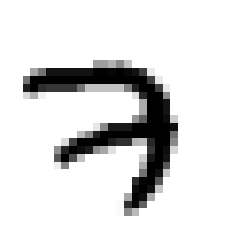

In [112]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()

In [113]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [114]:
y_train[0]

7

Saving figure mnist_plot


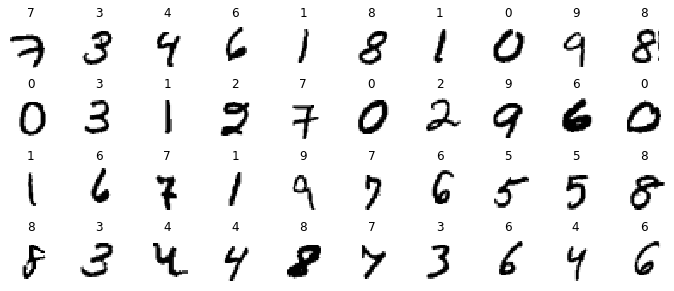

In [125]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('mnist_plot', tight_layout=False)
plt.show()

In [117]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [118]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_91 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_92 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])

In [127]:
history = model.fit(X_train,y_train,epochs=1,
                   validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 8s 138us/sample - loss: 0.0246 - accuracy: 0.9952 - val_loss: 0.0662 - val_accuracy: 0.9796


In [130]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06586771437567658, 0.9793]